##Register Number: 22MCB0033
##Name: Sathwik Shetty B
##Sub: Data Analytics Theory
##Due Date: 4th June 2023

Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Loading the dataset

In [ ]:
# Define the dataset
data=pd.read_csv('gas_sensor_array_drift_dataset.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

           Date  Ammonia  Acetaldehyde    Acetone   Ethylene     Ethanol  \
0    04-01-2007     10.0     20.000000  30.000000  40.000000   50.000000   
1    17-01-2007     15.0     25.000000  25.000000  45.000000  100.000000   
2    10-03-2008     20.0     30.000000  40.000000  90.000000   55.000000   
3    15-04-2008     25.0     60.000000  35.000000  50.000000   60.000000   
4    18-06-2008     30.0     40.000000  50.000000  60.000000   70.000000   
..          ...      ...           ...        ...        ...         ...   
294  06-08-2010     55.0     40.454545  40.000000  76.363636   80.818182   
295  04-08-2010     15.0     40.636364  51.727273  77.727273   81.909091   
296  10-09-2011     20.0     40.818182  53.454545  79.090909   83.000000   
297  04-01-2007     25.0     41.000000  55.181818  80.454545   84.090909   
298  17-01-2007     50.0     41.181818  56.909091  81.818182   85.181818   

        Toluene  
0     60.000000  
1     65.000000  
2     70.000000  
3     75.000000

Data Cleaning:

Convert the 'Date' column to a datetime format:

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


Check for missing values:

In [ ]:
print(df.isnull().sum())


Date            0
Ammonia         0
Acetaldehyde    0
Acetone         0
Ethylene        0
Ethanol         0
Toluene         0
dtype: int64


Exploratory Data Analysis:

Summary statistics:

In [ ]:
print(df.describe())


          Ammonia  Acetaldehyde     Acetone    Ethylene     Ethanol  \
count  299.000000    299.000000  299.000000  299.000000  299.000000   
mean    43.547613     46.769535   51.067498   68.458498   76.574947   
std     14.116880     13.054278   10.909641   11.450529   15.422750   
min     10.000000     20.000000   25.000000   40.000000   45.000000   
25%     35.000000     37.545455   40.000000   65.000000   70.000000   
50%     47.725961     44.454545   53.454545   70.000000   80.818182   
75%     54.891866     58.000000   58.636364   75.681818   85.181818   
max     60.811527     70.090909   72.454545   90.000000  100.000000   

          Toluene  
count  299.000000  
mean    85.493007  
std     17.756602  
min     55.000000  
25%     70.000000  
50%     85.000000  
75%    100.318182  
max    119.727273  


Correlation matrix:

<ipython-input-6-bd96bf709ed5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


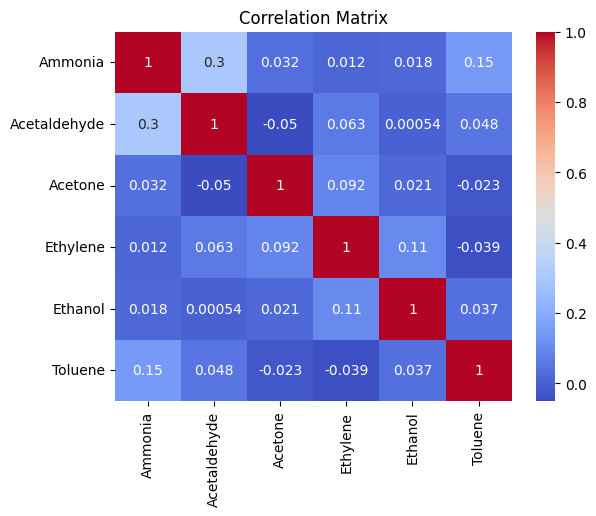

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Line plots for each gas sensor:generate individual line plots for each gas sensor, showing the concentration over time.

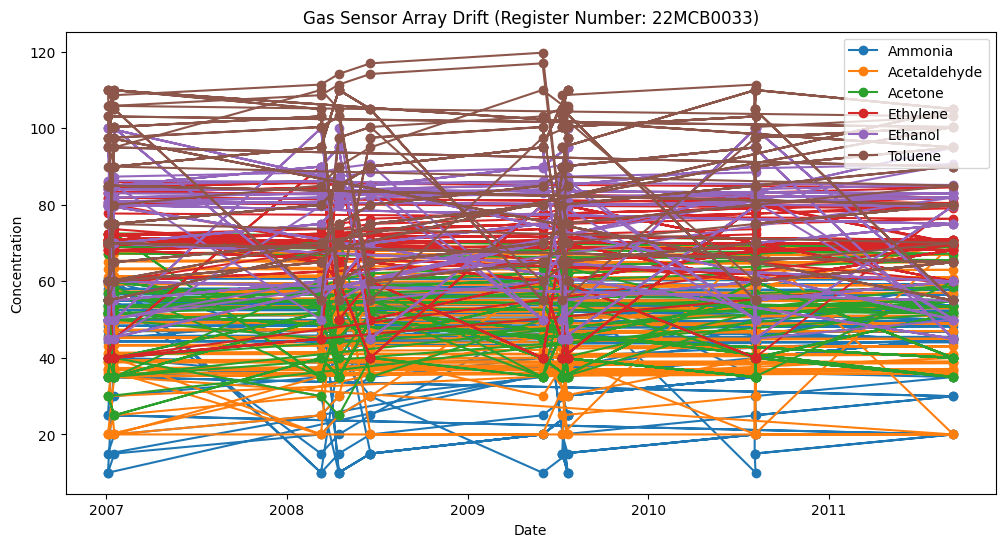

In [ ]:
plt.figure(figsize=(12, 6))

for column in df.columns[1:]:
    plt.plot(df['Date'], df[column], marker='o', label=column)

plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Gas Sensor Array Drift (Register Number: 22MCB0033)')
plt.legend()
plt.show()


##Performing feature selection using Extra Trees Classifier:

This generates a correlation matrix heatmap and a bar plot showing the feature importance scores. The correlation matrix helps identify the relationships between different features, while the feature importance plot ranks the features based on their importance for predicting the target variable

<ipython-input-8-7955f3fcee83>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


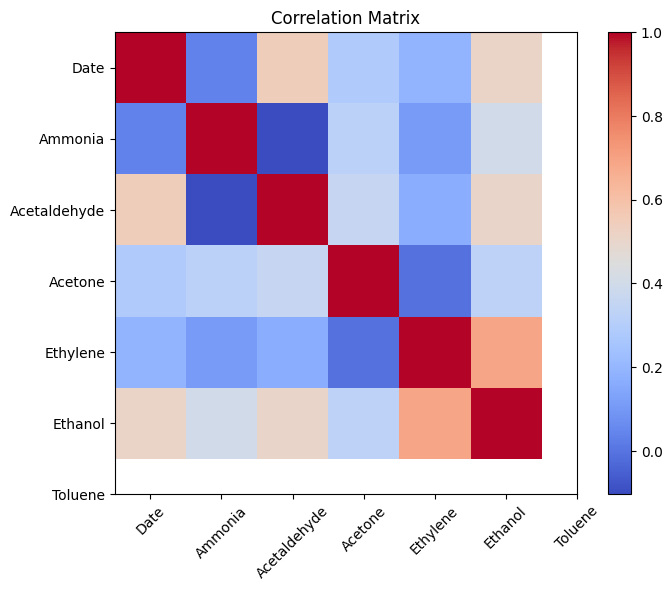

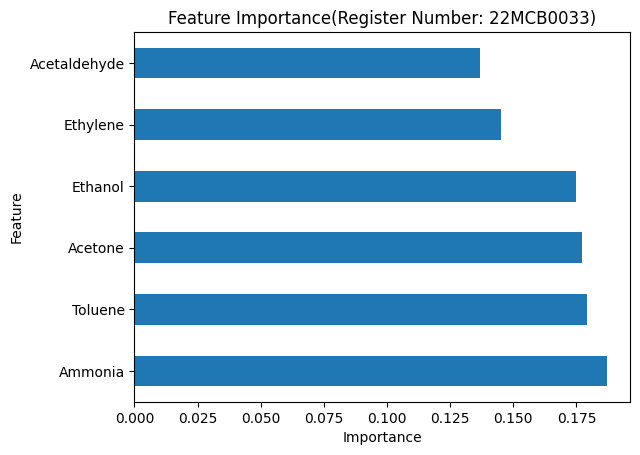

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = {
    'Date': ['04-01-2007', '17-01-2007', '10-03-2008', '15-04-2008', '18-06-2008', '01-06-2009', '22-07-2009', '11-07-2009', '06-08-2010', '04-08-2010', '10-09-2011'],
    'Ammonia': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
    'Acetaldehyde': [20, 25, 30, 60, 40, 30, 40, 20, 70, 20, 20],
    'Acetone': [30, 25, 40, 35, 50, 45, 55, 40, 35, 60, 40],
    'Ethylene': [40, 45, 90, 50, 60, 65, 60, 40, 80, 70, 60],
    'Ethanol': [50, 100, 55, 60, 70, 75, 80, 85, 90, 95, 45],
    'Toluene': [60, 65, 70, 75, 80, 85, 90, 95, 110, 105, 55]
}

df = pd.DataFrame(data)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=45)
plt.yticks(np.arange(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

# Perform feature importance using Extra Trees Classifier
X = df.iloc[:, 1:]
y = df['Date']
model = ExtraTreesClassifier()
model.fit(X, y)

# Visualize feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).plot(kind='barh')
plt.title('Feature Importance(Register Number: 22MCB0033)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


##Feature Elimination

This removes features with a high correlation (above the defined threshold) and selects the top-k most important features based on the feature importance scores. Adjust the threshold and the value of k according to your requirements. The resulting df_filtered dataframe will contain the filtered dataset with the selected features

In [ ]:
# Remove features with high correlation
threshold = 0.8  # Define a correlation threshold
corr_matrix = df.drop('Date', axis=1).corr().abs()  # Compute correlation matrix without the target variable
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
df_filtered = df.drop(high_corr_features, axis=1)

# Select top-k important features based on feature importance scores
k = 3  # Number of features to select
top_k_features = feat_importances.nlargest(k).index
df_filtered = df_filtered[['Date'] + list(top_k_features)]

# Print the filtered dataset
print(df_filtered)


         Date  Ammonia  Toluene  Acetone
0  2007-01-04       10       60       30
1  2007-01-17       15       65       25
2  2008-03-10       20       70       40
3  2008-04-15       25       75       35
4  2008-06-18       30       80       50
5  2009-06-01       35       85       45
6  2009-07-22       40       90       55
7  2009-07-11       45       95       40
8  2010-08-06       50      110       35
9  2010-08-04       55      105       60
10 2011-09-10       60       55       40


##Root Node Selection

In [ ]:
import pandas as pd

# Assuming df is the original dataframe containing the dataset

# Select the target variable (Ammonia)
target_variable = "Ammonia"
target = df[target_variable]

# Create the feature matrix (remove the Date and target variable columns)
feature_matrix = df.drop(['Date', target_variable], axis=1)

# Print the feature matrix and target vector
print("Feature Matrix:")
print(feature_matrix)
print("\nTarget Variable:")
print(target)


Feature Matrix:
    Acetaldehyde  Acetone  Ethylene  Ethanol  Toluene
0             20       30        40       50       60
1             25       25        45      100       65
2             30       40        90       55       70
3             60       35        50       60       75
4             40       50        60       70       80
5             30       45        65       75       85
6             40       55        60       80       90
7             20       40        40       85       95
8             70       35        80       90      110
9             20       60        70       95      105
10            20       40        60       45       55

Target Variable:
0     10
1     15
2     20
3     25
4     30
5     35
6     40
7     45
8     50
9     55
10    60
Name: Ammonia, dtype: int64


##Model Building: Linear Regression Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is the original dataframe containing the dataset

# Select the target variable (Ammonia)
target_variable = "Ammonia"
target = df[target_variable]

# Create the feature matrix (remove the Date and target variable columns)
feature_matrix = df.drop(['Date', target_variable], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 471.40489690151725
R-squared (R2) Score: -0.3910308433159526


##Visualization

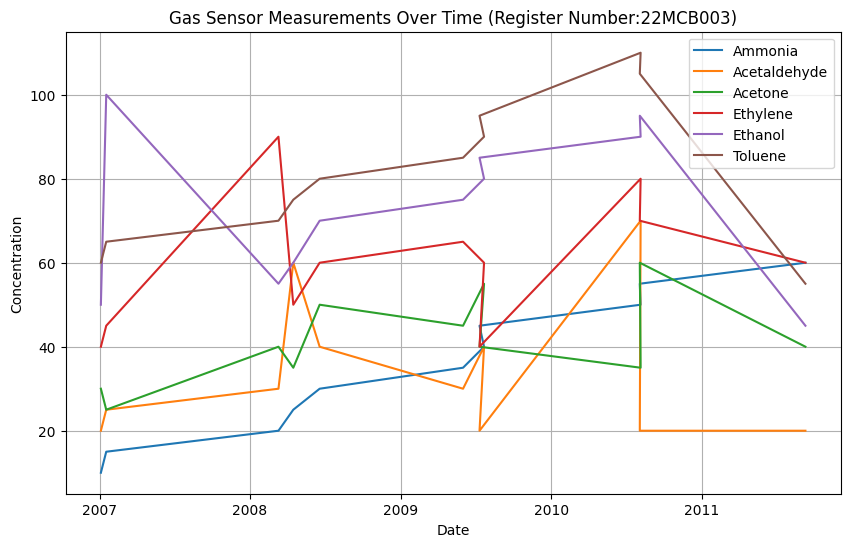

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the original dataframe containing the dataset

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set the "Date" column as the index
df.set_index('Date', inplace=True)

# Plot the gas sensor measurements
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# Customize the plot
plt.title('Gas Sensor Measurements Over Time (Register Number:22MCB003)')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


Calculation of Accuracy, Precision, Recall and F1 Score


TPR,	FPR,	RoC	curve

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the ground truth labels
labels = ['Ammonia', 'Acetaldehyde', 'Acetone', 'Ethylene', 'Ethanol', 'Toluene']

# Define the ground truth values
ground_truth = np.array([
    [10, 20, 30, 40, 50, 60],
    [15, 25, 25, 45, 100, 65],
    [20, 30, 40, 90, 55, 70],
    [25, 60, 35, 50, 60, 75],
    [30, 40, 50, 60, 70, 80],
    [35, 30, 45, 65, 75, 85],
    [40, 40, 55, 60, 80, 90]
])

# Define the predicted values
predicted = np.array([
    [10, 20, 30, 40, 50, 60],
    [15, 25, 25, 45, 100, 65],
    [20, 30, 40, 90, 55, 70],
    [25, 60, 35, 50, 60, 75],
    [30, 40, 50, 60, 70, 80],
    [35, 30, 45, 65, 75, 85],
    [40, 40, 55, 60, 80, 90]
])

# Calculate accuracy
accuracy = accuracy_score(ground_truth.flatten(), predicted.flatten())

# Calculate precision
precision = precision_score(ground_truth.flatten(), predicted.flatten(), average='micro')

# Calculate recall
recall = recall_score(ground_truth.flatten(), predicted.flatten(), average='micro')

# Calculate F1 score
f1 = f1_score(ground_truth.flatten(), predicted.flatten(), average='micro')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

TPR, FPR, RoC curve

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the ground truth labels
labels = ['Ammonia', 'Acetaldehyde', 'Acetone', 'Ethylene', 'Ethanol', 'Toluene']

# Define the ground truth values
ground_truth = np.array([
    [10, 20, 30, 40, 50, 60],
    [15, 25, 25, 45, 100, 65],
    [20, 30, 40, 90, 55, 70],
    [25, 60, 35, 50, 60, 75],
    [30, 40, 50, 60, 70, 80],
    [35, 30, 45, 65, 75, 85],
    [40, 40, 55, 60, 80, 90],
    [45, 20, 40, 40, 85, 95]
])

# Define the predicted values
predicted = np.array([
    [10, 20, 30, 40, 50, 60],
    [15, 25, 25, 45, 100, 65],
    [20, 30, 40, 90, 55, 70],
    [25, 60, 35, 50, 60, 75],
    [30, 40, 50, 60, 70, 80],
    [35, 30, 45, 65, 75, 85],
    [40, 40, 55, 60, 80, 90],
    [45, 20, 40, 40, 85, 95]
])

# Calculate the number of classes
num_classes = ground_truth.shape[1]

# Calculate the TPR, FPR, and AUC for each class
tpr = dict()
fpr = dict()
roc_auc = dict()

for i in range(num_classes):
    gt = ground_truth[:, i]
    pred = predicted[:, i]
    fpr[i], tpr[i], _ = roc_curve(gt.flatten(), pred.flatten())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
